<a href="https://colab.research.google.com/github/ahyoungKwon/aipython/blob/main/240531.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

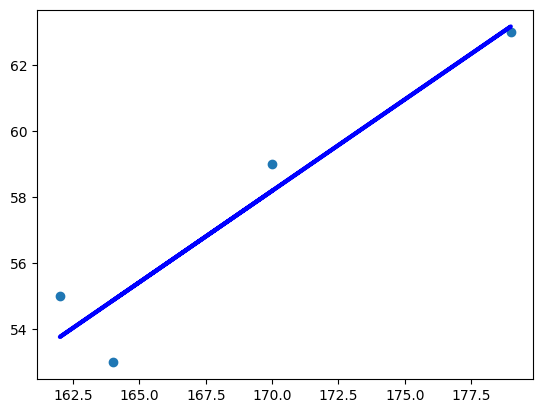

In [3]:
#실습 1
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

regr = linear_model.LinearRegression()

x = [[164], [179], [162], [170]]
y = [53, 63, 55, 59]
regr.fit(x, y)

plt.scatter(x, y)
y_pred = regr.predict(x)

plt.plot(x, y_pred, color = 'blue', linewidth = 3)
plt.show()

[189.55106566 316.14785212]


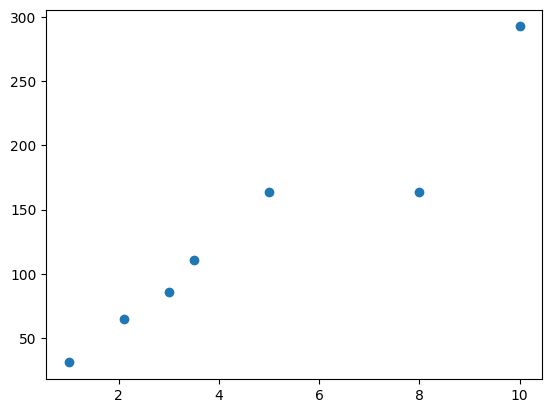

In [8]:
# 재배 면적, 수확량
x = [[2.1], [10], [3], [1], [3.5], [5], [8]]
y = [64.9, 292.6, 85.9, 30.92, 110.5, 163.4, 163.4]

plt.scatter(x, y)

regr = linear_model.LinearRegression()

regr.fit(x, y)

result = regr.predict([[7], [12]])
print(result)

In [15]:
# 키 데이터
parents_height = [[180, 165], [175, 160], [180, 172], [165, 160], [171, 152]]
child_height = [3, 2, 2, 1, 1]

from sklearn import tree

df_model = tree.DecisionTreeClassifier()

df_model.fit(parents_height, child_height)

df_pred = df_model.predict([[175, 153]])
print(df_pred)

[2]


In [16]:
# 캐글

import pandas as pd

std_df = pd.read_csv('Student_Marks.csv')
std_df

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299
...,...,...,...
95,6,3.561,19.128
96,3,0.301,5.609
97,4,7.163,41.444
98,7,0.309,12.027


In [17]:
std_df.describe()

,number_courses,time_study,Marks
count,100.000000,100.000000,100.000000
mean,5.290000,4.077140,24.417690
std,1.799523,2.372914,14.326199
min,3.000000,0.096000,5.609000
25%,4.000000,2.058500,12.633000
50%,5.000000,4.022000,20.059500
75%,7.000000,6.179250,36.676250
max,8.000000,7.957000,55.299000


In [18]:
std_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   number_courses  100 non-null    int64  
 1   time_study      100 non-null    float64
 2   Marks           100 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [19]:
std_df.head()

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299


In [20]:
std_df.tail()

,number_courses,time_study,Marks
95,6,3.561,19.128
96,3,0.301,5.609
97,4,7.163,41.444
98,7,0.309,12.027
99,3,6.335,32.357


In [21]:
std_df.corr()

,number_courses,time_study,Marks
number_courses,1.000000,0.204844,0.417335
time_study,0.204844,1.000000,0.942254
Marks,0.417335,0.942254,1.000000


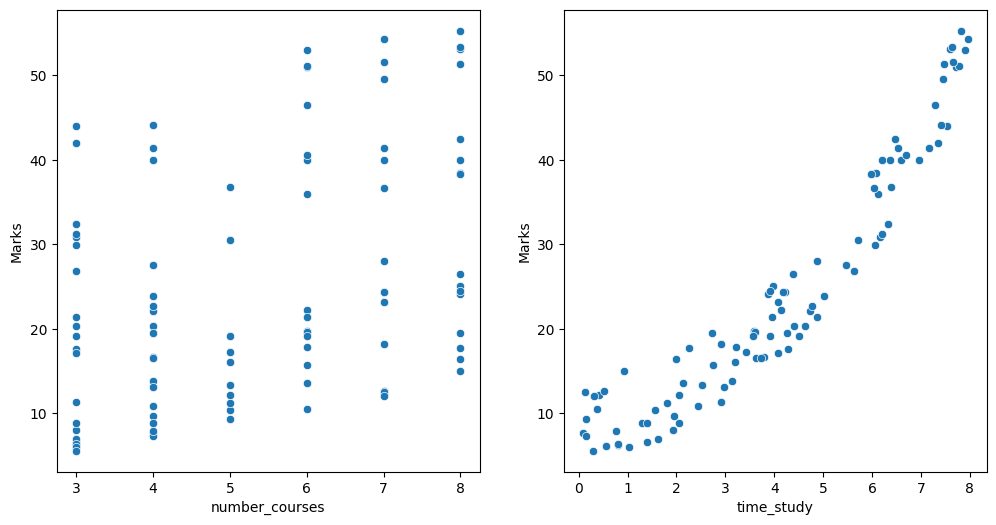

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(ncols = 2, figsize = (12, 6))
sns.scatterplot(data = std_df, x = 'number_courses', y = 'Marks', ax = ax[0])
sns.scatterplot(data = std_df, x = 'time_study', y = 'Marks', ax = ax[1])
plt.show()

In [23]:
from sklearn.model_selection import train_test_split

x = std_df.drop('Marks', axis = 1) #점수를 날려 독립변수만
y = std_df['Marks']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [24]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()

In [25]:
lr_model.fit(x_train, y_train)

LinearRegression()

In [26]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [27]:
lr_pred = lr_model.predict(x_test)
mean_squared_error(lr_pred, y_test)

14.200726136374552

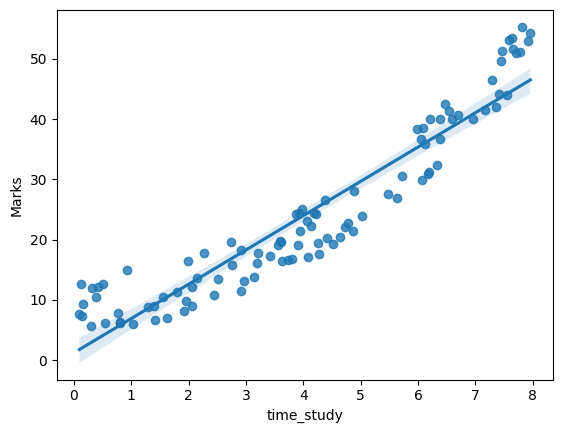

In [28]:
sns.regplot(x = std_df['time_study'], y = std_df['Marks'])
plt.show()